In [42]:
import numpy as np
import pandas as pd
import pinocchio as pin
from pinocchio.rpy import matrixToRpy, rpyToMatrix
import matplotlib.pyplot as plt

In [43]:
# test quaternion

# pinocchio quaternion order: x, y, z, w
x = [0, 0, 0, 1]
y = [0,0,0]
quat_norm = pin.Quaternion(np.matrix(x).T).normalized()
R = quat_norm.toRotationMatrix()
rpy = matrixToRpy(R)
R_ = rpyToMatrix(np.matrix(y).T)

In [46]:
#load data from csv
path = 'calibration/shoulder_pitch/shoulder_pitch.xlsx'
forearm_data = pd.read_excel(path, sheet_name='forearm')
chest_data = pd.read_excel(path, sheet_name='chest')
shoulder_data = pd.read_excel(path, sheet_name='shoulder')
upperarm_data = pd.read_excel(path, sheet_name='upperarm')

def toQuat(data):
    ret = []
    for x, y, z, w in zip(data.quat_x, data.quat_y, data.quat_z, data.quat_w):
        ret.append([x, y, z, w])
    return ret

def toRpy(data):
    ret = []
    data0 = data[0]
    quat_norm0 = pin.Quaternion(np.matrix(data0).T).normalized()
    R0 = quat_norm0.toRotationMatrix()
    for quat in data:
        quat_norm = pin.Quaternion(np.matrix(quat).T).normalized()
        R=quat_norm.toRotationMatrix().dot(np.linalg.inv(R0))
#         R=quat_norm.toRotationMatrix()
        ret.append(matrixToRpy(R))
    return ret

def toRot(data):
    ret = []
    for quat in data:
        quat_norm = pin.Quaternion(np.matrix(quat).T).normalized()
        R=quat_norm.toRotationMatrix()
        ret.append(R)
    return ret

def plotRpy(rpy, title=""):
    plt.figure()
    xrange = np.arange(len(rpy))/240.
    plt.plot(xrange,[_rpy[0]/np.pi*180 for _rpy in rpy], label='x')
    plt.plot(xrange,[_rpy[1]/np.pi*180 for _rpy in rpy], label='y')
    plt.plot(xrange,[_rpy[2]/np.pi*180 for _rpy in rpy], label='z')
    plt.legend()
#     plt.ylim([-180, 180])
    plt.xlabel('time [s]')
    plt.ylabel(title+' [degree]')
    
chest_quat = toQuat(chest_data)
shoulder_quat = toQuat(shoulder_data)
forearm_quat = toQuat(forearm_data)
upperarm_quat = toQuat(upperarm_data)

chest_rot = toRot(chest_quat)
shoulder_rot = toRot(shoulder_quat)
forearm_rot = toRot(forearm_quat)
upperarm_rot = toRot(upperarm_quat)

chest_rpy = toRpy(chest_quat)
shoulder_rpy = toRpy(shoulder_quat)
forearm_rpy = toRpy(forearm_quat)
upperarm_rpy = toRpy(upperarm_quat)

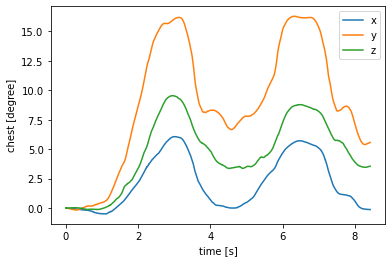

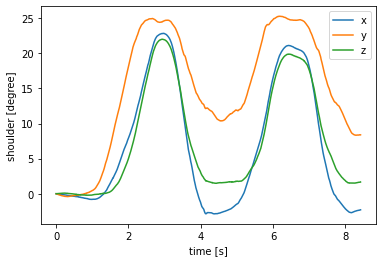

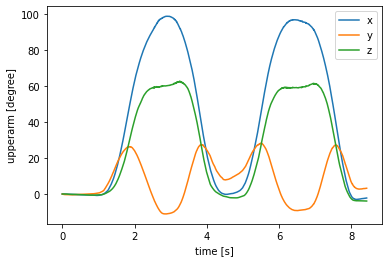

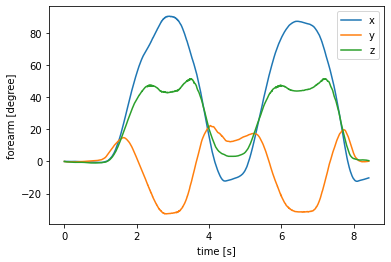

In [47]:
plotRpy(chest_rpy, title="chest")
plotRpy(shoulder_rpy, title="shoulder")
plotRpy(upperarm_rpy, title="upperarm")
plotRpy(forearm_rpy, title="forearm")